<a href="https://colab.research.google.com/github/Laurarpoa/Grupo-de-trabajo-/blob/main/Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime

np.random.seed(42)  # Para reproducibilidad

# Generar datos
rng = pd.date_range(start="2023-01-01", end="2023-12-31", freq="D")
data = pd.DataFrame({
    "Fecha": rng,
    "Producto": np.random.choice(["Laptop", "Teléfono", "Tablet", "Auriculares", "Monitor"], size=len(rng)),
    "Categoría": np.random.choice(["Electrónicos", "Hogar", "Oficina"], size=len(rng)),
    "Precio": np.round(np.random.uniform(50, 1500, len(rng)), 2),
    "Cantidad": np.random.randint(1, 10, len(rng)),
    "Región": np.random.choice(["Norte", "Sur", "Este", "Oeste"], size=len(rng)),
    "Cliente_Frecuente": np.random.choice([True, False], size=len(rng), p=[0.3, 0.7])
})

# Calcular ventas totales
data["Ventas_Totales"] = data["Precio"] * data["Cantidad"]

# Mostrar primeros 5 registros
print(data.head())

       Fecha     Producto     Categoría   Precio  Cantidad Región  \
0 2023-01-01  Auriculares         Hogar  1433.37         2  Oeste   
1 2023-01-02      Monitor  Electrónicos   928.95         1  Oeste   
2 2023-01-03       Tablet         Hogar   381.53         5    Sur   
3 2023-01-04      Monitor       Oficina  1023.97         4   Este   
4 2023-01-05      Monitor       Oficina   946.29         2  Oeste   

   Cliente_Frecuente  Ventas_Totales  
0               True         2866.74  
1              False          928.95  
2              False         1907.65  
3              False         4095.88  
4              False         1892.58  


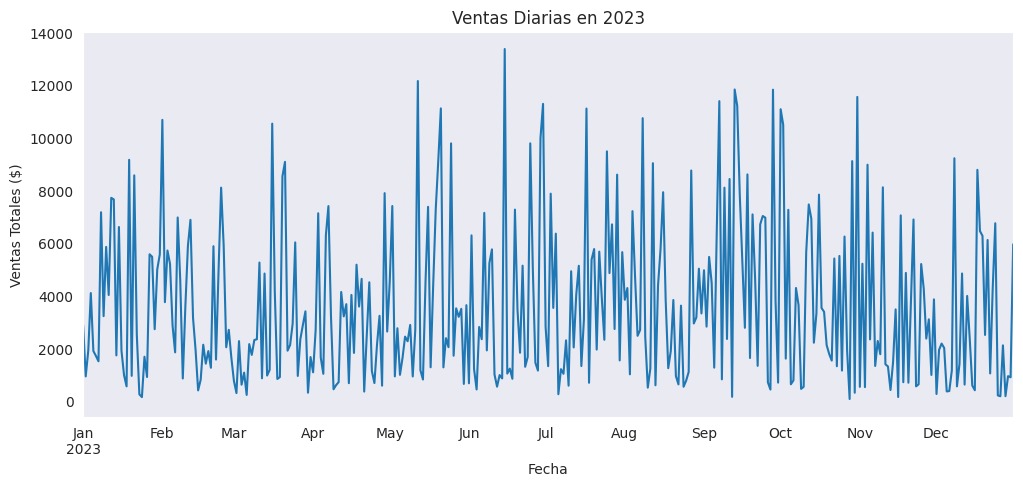

In [ ]:
data.groupby("Fecha")["Ventas_Totales"].sum().plot(figsize=(12, 5))
plt.title("Ventas Diarias en 2023")
plt.ylabel("Ventas Totales ($)")
plt.grid()

Text(0.5, 1.0, 'Distribución de Cantidades Vendidas por Producto')

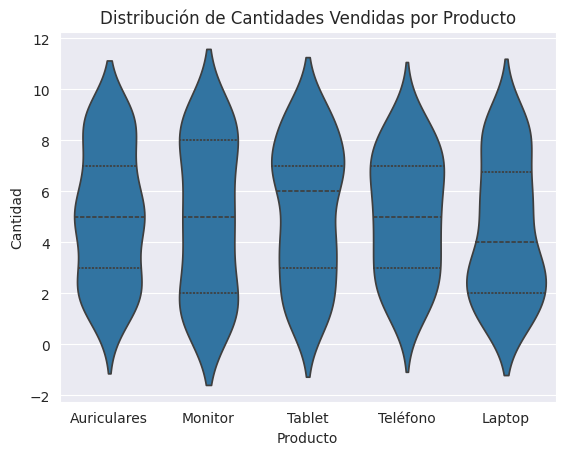

In [ ]:
sns.violinplot(x="Producto", y="Cantidad", data=data, inner="quartile")
plt.title("Distribución de Cantidades Vendidas por Producto")


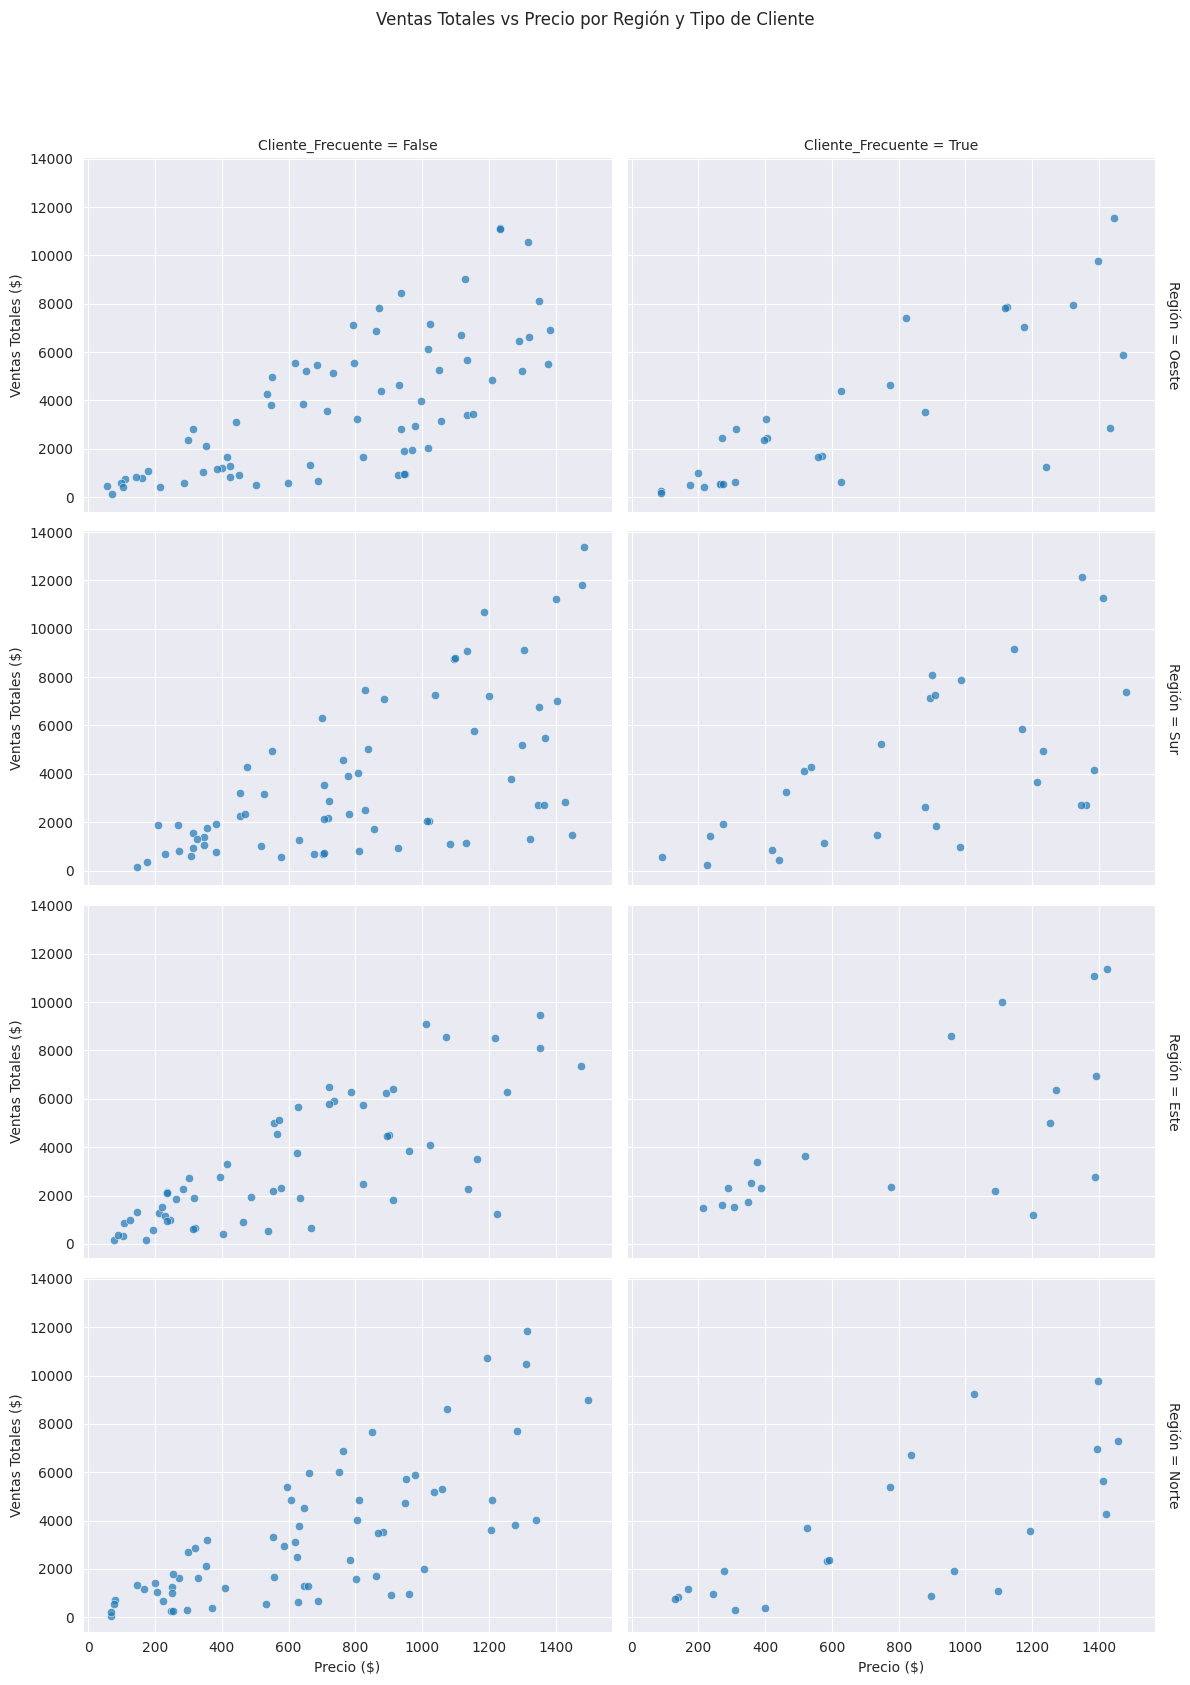

In [ ]:
# Crear una columna de Mes para faceting
data["Mes"] = data["Fecha"].dt.month_name()

# FacetGrid
g = sns.FacetGrid(
    data,
    row="Región",
    col="Cliente_Frecuente",
    margin_titles=True,
    height=4,
    aspect=1.5
)
g.map(sns.scatterplot, "Precio", "Ventas_Totales", alpha=0.7)
g.fig.suptitle("Ventas Totales vs Precio por Región y Tipo de Cliente", y=1.05)
g.set_axis_labels("Precio ($)", "Ventas Totales ($)")
plt.tight_layout()
plt.show()

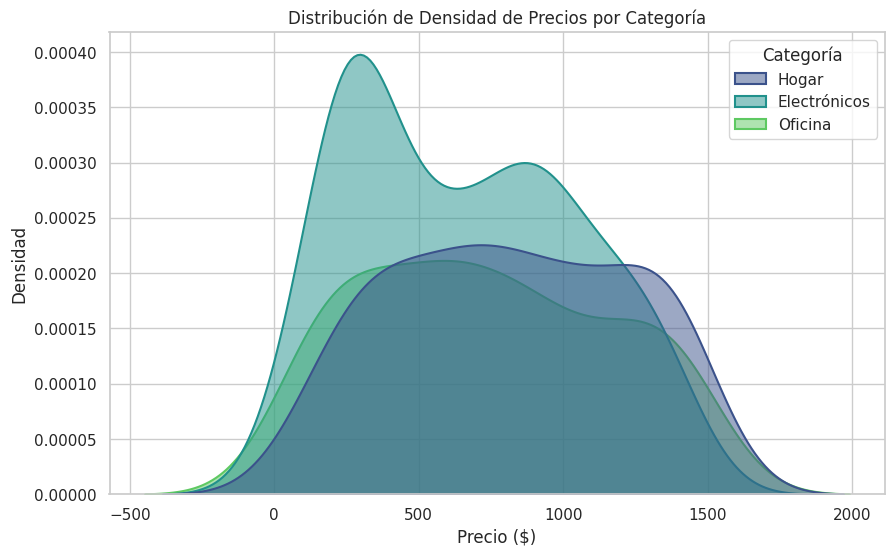

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar estilo
sns.set_theme(style="whitegrid")

# KDE Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=data,
    x="Precio",
    hue="Categoría",
    fill=True,
    palette="viridis",
    alpha=0.5,
    linewidth=1.5
)
plt.title("Distribución de Densidad de Precios por Categoría")
plt.xlabel("Precio ($)")
plt.ylabel("Densidad")
plt.show()

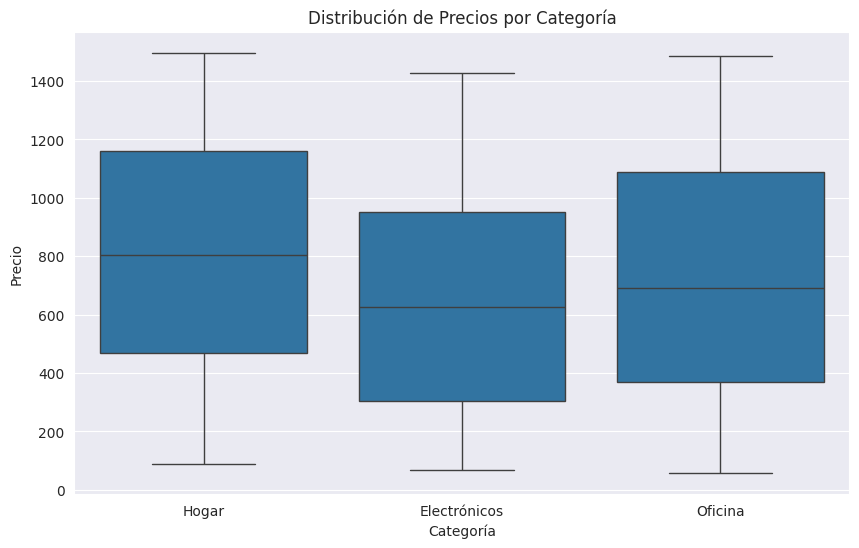

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Categoría", y="Precio", data=data)
plt.title("Distribución de Precios por Categoría")
plt.show()
